# Introduction
Initial basic analysis of the projects training data. Prints out some info about the data.

In [23]:
import os
import pandas as pd

# Load training data and print general info about the data frame
df = pd.read_csv("../data/external/kaggle/train.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [32]:
import spacy

def preproc(x):
    txt = " ".join([str(x[i]) for i in range(0, 3) if str(x[i]) != "nan"])
    return sp(txt)

# Load spacy model and parse tweets into spacy docs
sp = spacy.load('en_core_web_sm')
X_sp = np.array([preproc(x) for x in df[['keyword', 'location', 'text']].values], dtype=object)

## Class Balance
A barplot of the class distribtions in the data shows which class is overrepresented and if the data set may need rebalancing. If the classes are inbalanced, some algorithms require additional preprocessing or configuration of data to get good results.

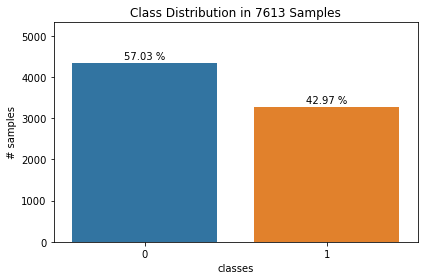

In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plot class balance in training data
plt.figure()
plt.title("Class Distribution in {} Samples".format(len(y)))
y = df["target"]
data = {}
classes = np.unique(y)
class_distr = []
for class_label in classes:
    class_distr.append(np.sum(y == class_label))
ax = sns.barplot(x=classes, y=class_distr)

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = (p.get_y() + p.get_height())+100
    value = '{:.2f} %'.format(p.get_height()/len(y)*100)
    ax.text(_x, _y, value, ha="center")

plt.xlabel("classes")
plt.ylabel("# samples")
plt.ylim([0, len(y)*0.7])
plt.tight_layout()
plt.show()


## Word Clouds
A word cloud for each class shows the words which occur the most in each class. The idea is to get a first grasp of how the words look like in different classes.

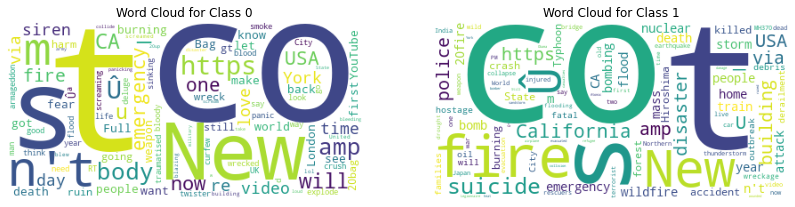

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

max_words = 100
# Plot word clouds per class
plt.figure(figsize=(14, 8))

# Plot wordcloud of unprocessed text for class 0
text = " ".join([" ".join([t.text for t in d]) for d in X_sp[y == 0]])
wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
plt.subplot2grid((1, 2), (0, 0))
plt.title("Word Cloud for Class 0")
plt.axis('off')
plt.imshow(wordcloud_img)
# Plot wordcloud of unprocessed text for class 1
text = " ".join([" ".join([t.text for t in d]) for d in X_sp[y == 1]])
wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
plt.subplot2grid((1, 2), (0, 1))
plt.title("Word Cloud for Class 1")
plt.axis('off')
plt.imshow(wordcloud_img)

plt.show()


# text = " ".join([" ".join([t.text for t in d if not t.is_stop and t.is_alpha]) for d in mc_tweets_c0])


We can see that there is a lot of noise that does not seem to be relevant for classification of disaster tweets. So lets try to remove stop words and non-alphabetic tokens to generate new wordclouds.

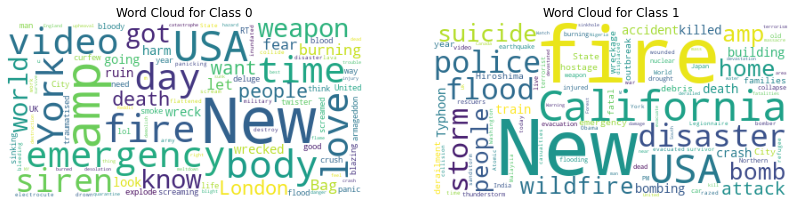

In [45]:
plt.figure(figsize=(14, 8))

# Plot wordcloud of unprocessed text for class 0
text = " ".join([" ".join([t.text for t in d if not t.is_stop and t.is_alpha]) for d in X_sp[y == 0]])
wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
plt.subplot2grid((1, 2), (0, 0))
plt.title("Word Cloud for Class 0")
plt.axis('off')
plt.imshow(wordcloud_img)
# Plot wordcloud of unprocessed text for class 1
text = " ".join([" ".join([t.text for t in d if not t.is_stop and t.is_alpha]) for d in X_sp[y == 1]])
wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
plt.subplot2grid((1, 2), (0, 1))
plt.title("Word Cloud for Class 1")
plt.axis('off')
plt.imshow(wordcloud_img)

plt.show()

Now lets additionally use the lemmatized words instead of the plain text:

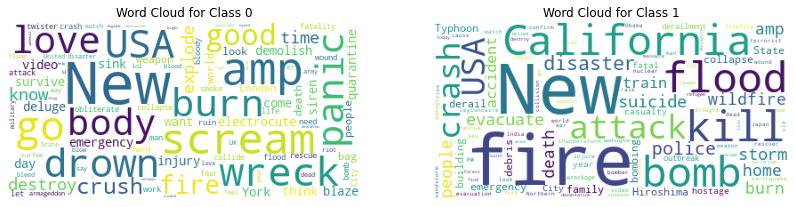

In [48]:
plt.figure(figsize=(14, 8))

# Plot wordcloud of unprocessed text for class 0
text = " ".join([" ".join([t.lemma_ for t in d if not t.is_stop and t.is_alpha]) for d in X_sp[y == 0]])
wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
plt.subplot2grid((1, 2), (0, 0))
plt.title("Word Cloud for Class 0")
plt.axis('off')
plt.imshow(wordcloud_img)
# Plot wordcloud of unprocessed text for class 1
text = " ".join([" ".join([t.lemma_ for t in d if not t.is_stop and t.is_alpha]) for d in X_sp[y == 1]])
wordcloud_img = WordCloud(background_color='white', collocations=False, max_words=max_words).generate(text)
plt.subplot2grid((1, 2), (0, 1))
plt.title("Word Cloud for Class 1")
plt.axis('off')
plt.imshow(wordcloud_img)

plt.show()